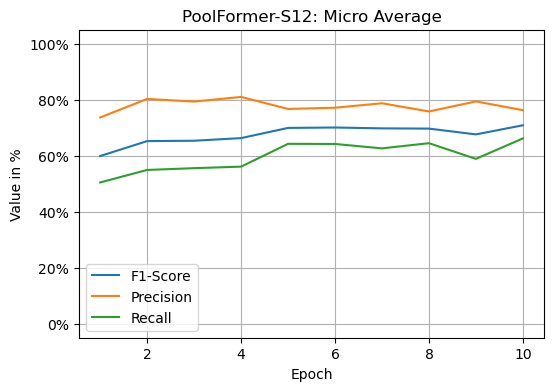

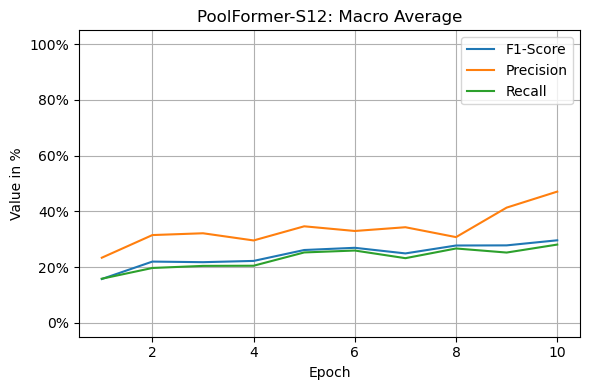

In [1]:
import pickle
from pathlib import Path

from utils.plotting import create_micro_macro_plot

model_name="PoolFormer-S12"
img_dir = Path("img/")
results_dir = Path("checkpoints/")

with open(f"checkpoints/{model_name}_results.pkl", "rb") as f:
    results = pickle.load(f)

create_micro_macro_plot(
    results,
    show=True,
    save_micro=str(img_dir / f"{model_name}_micro.png"),
    save_macro=str(img_dir / f"{model_name}_macro.png"),
    model_type=model_name
)


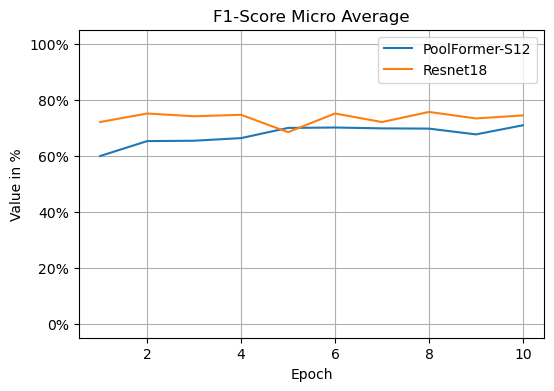

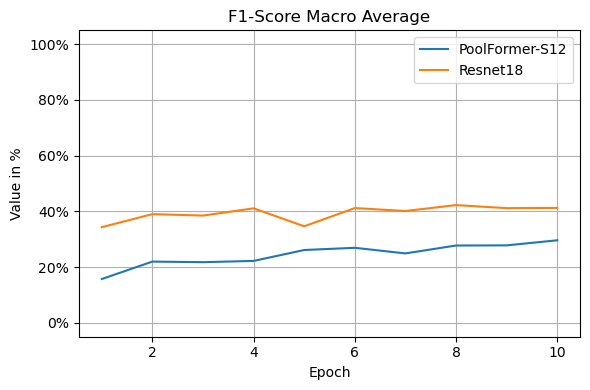

In [8]:
import pickle
from pathlib import Path

from utils.plotting import create_model_comparison_plot

model_names=["PoolFormer-S12", "Resnet18"]
img_dir = Path("img/")
results_dir = Path("checkpoints/")

results = {
    "micro avg": {},
    "macro avg": {},
}
for model_name in model_names:
    with open(f"checkpoints/{model_name}_results.pkl", "rb") as f:
        curr_results = pickle.load(f)
        results["micro avg"][model_name.lower()] = curr_results["micro avg"]["f1-score"]
        results["macro avg"][model_name.lower()] = curr_results["macro avg"]["f1-score"]

create_model_comparison_plot(
    results,
    model_types=model_names,
    show=True,
    save_micro=str(img_dir / f"{'-'.join(model_names)}_micro.png"),
    save_macro=str(img_dir / f"{'-'.join(model_names)}_macro.png"),
)